In [ ]:
! pip install -U spacy
! python -m spacy download es_core_news_md

In [ ]:
import spacy

import es_core_news_md

nlp = es_core_news_md.load()

# Retomando el ejercicio de las sesiones 2 y 3

Paso 1: Definir la ruta de Drive en la cual esta guardado nuestro archivo.

Paso 2: Cargar esos datos en una variable llamada `datos`. En este caso el comando `sep="\t"` es necesario cuando nuestros datos están en formato `.tsv`.

Paso 3: Imprimir la variable `datos`.

In [ ]:
import pandas as pd

ruta = '/datos_deteccion_sexismo.tsv'

datos = pd.read_csv(ruta, sep="\t")
datos

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist
...,...,...,...,...,...,...,...
6972,EXIST2021,6973,twitter,es,"Estamos igual sin pareja, pero puedes besar a ...",non-sexist,non-sexist
6973,EXIST2021,6974,twitter,es,2020 hijo de re mil putas,non-sexist,non-sexist
6974,EXIST2021,6975,twitter,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...,non-sexist,non-sexist
6975,EXIST2021,6976,twitter,es,@safetyaitana mi madre dice q va fea y i agree,sexist,objectification


In [ ]:
datos.drop(['test_case', 'id', 'source', 'task1', 'task2'], axis=1, inplace=True)
datos

,language,text
0,en,"She calls herself ""anti-feminazi"" how about sh..."
1,en,"Now, back to these women, the brave and the be..."
2,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve..."
3,en,@AurelieGuiboud Incredible! Beautiful!But I l...
4,en,i find it extremely hard to believe that kelly...
...,...,...
6972,es,"Estamos igual sin pareja, pero puedes besar a ..."
6973,es,2020 hijo de re mil putas
6974,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...
6975,es,@safetyaitana mi madre dice q va fea y i agree


In [ ]:
datos = datos[datos['language'] != 'en']
datos

,language,text
3436,es,Nadie te va a tratar tan bien como un hombre q...
3437,es,"@lindagisela74 Que rica putita obediente, afor..."
3438,es,@BicireporteraDF Yo lo hice a los 18 años por ...
3439,es,las cosas q sueño son indicios de que yo enrea...
3440,es,"Pero a la niña le gustó desde que lo vió, así ..."
...,...,...
6972,es,"Estamos igual sin pareja, pero puedes besar a ..."
6973,es,2020 hijo de re mil putas
6974,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...
6975,es,@safetyaitana mi madre dice q va fea y i agree


In [ ]:
tuits = []

for tuit in datos['text']:
  tuits.append(str(tuit))

tuits

In [ ]:
len(tuits)

3541

In [ ]:
tokens_texto = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_texto.append(token.text)

In [ ]:
tokens_texto

In [ ]:
len(tokens_texto)

In [ ]:
partes_del_discurso = []
explicacion = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    partes_del_discurso.append(token.pos_)
    explicacion.append(token.tag_)

In [ ]:
len(partes_del_discurso)

115635

In [ ]:
from collections import Counter

contador_partes_del_discurso = Counter(partes_del_discurso)
contador_partes_del_discurso.most_common(10)

[('NOUN', 18380),
 ('VERB', 13296),
 ('DET', 12383),
 ('ADP', 12301),
 ('PUNCT', 11416),
 ('PROPN', 10917),
 ('PRON', 9186),
 ('ADJ', 6484),
 ('ADV', 6159),
 ('AUX', 5412)]

In [ ]:
etiquetas_dependencias_gramaticales = []
explicacion_dependencias = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    etiquetas_dependencias_gramaticales.append(token.dep_)
    explicacion_dependencias.append(spacy.explain(token.dep_))

In [ ]:
etiquetas_dependencias_gramaticales

In [ ]:
contador_etiquetas_dependencias_gramaticales  = Counter(etiquetas_dependencias_gramaticales )
contador_etiquetas_dependencias_gramaticales.most_common(10)

[('det', 12859),
 ('punct', 11858),
 ('case', 9683),
 ('obj', 9008),
 ('ROOT', 7518),
 ('advmod', 6588),
 ('nsubj', 6510),
 ('mark', 6084),
 ('nmod', 4363),
 ('advcl', 4201)]

In [ ]:
tokens_con_alfanumericos = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_con_alfanumericos.append(token.is_alpha)

In [ ]:
contador_tokens_con_alfanumericos  = Counter(tokens_con_alfanumericos)
contador_tokens_con_alfanumericos.most_common(10)

[(True, 96543), (False, 19092)]

In [ ]:
tokens_con_minusculas = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_con_minusculas.append(token.is_lower)

In [ ]:
contador_tokens_con_minusculas  = Counter(tokens_con_minusculas)
contador_tokens_con_minusculas.most_common(10)

In [ ]:
tokens_con_mayusculas = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_con_mayusculas.append(token.is_upper)

In [ ]:
contador_tokens_con_mayusculas  = Counter(tokens_con_mayusculas)
contador_tokens_con_mayusculas.most_common(10)

In [ ]:
tokens_de_signos_de_puntuacion = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    tokens_de_signos_de_puntuacion.append(token.is_punct)

In [ ]:
contador_tokens_de_signos_de_puntuacion = Counter(tokens_de_signos_de_puntuacion)
contador_tokens_de_signos_de_puntuacion.most_common(10)

In [ ]:
lemmas = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    lemmas.append(token.lemma_)

In [ ]:
lemmas

# Siguiente paso: Obtener sólo ciertas POS

Anteriormente hemos:

1. Cargado un modelo de español de spaCy.
2. Cargado un conjunto de datos usando pandas.
3. Hecho limpieza de los datos (eliminación de ciertas columnas, eliminación de tuits marcados como 'en', etc.)
4. Procesado los datos usando el modelo de español precargado.
5. Extraído las tokens, POS, dependencias sintácticas, tokens alfanuméricos, etc. de nuestros datos.

Ahora, usando la información del paso 5, extraeremos **sólo** ciertas POS que nos interesen. Antes extraímos todas las POS de nuestros datos, pero a veces no queremos eso. 

Para obtener sólo las POS que nos interesen, debemos incluir un ciclo `if` que coondicione la extracción a lo que queramos. 

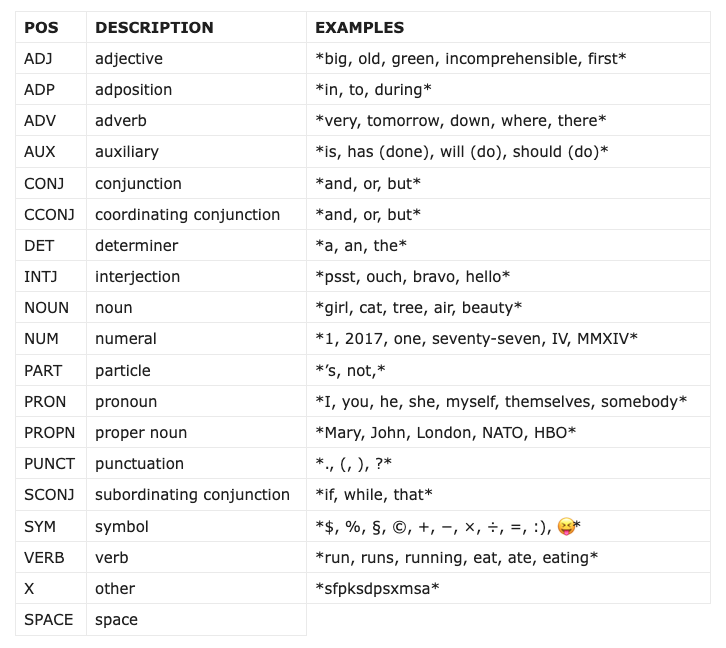

Ejemplo: Extraeremos sólo los tokens POS que concuerden con la etiqueta `ADJ`. 

Lo que pasará es que, de todas las POS, guardaremos sólo las tokens cuya POS sea igual a `ADJ`. O sea, obtendremos sólo los tokens que spaCy haya etiquetado como adjetivos.

Recordemos que la lista `partes_del_discurso` generada anteriormente ya contiene todas las POS de nuestros datos. Crearemos una lista idéntica, pero le agregaremos los `tokens.text`, pues anteriormente sólo guardamos los `token.pos_` con el fin de no sólo obtener todas las etiquetas sino los tokens a los cuales les correspondan esas etiquetas.

In [ ]:
# esta lista contendrá sólo los tokens que hayan sido etiquetados como "ADJ".
tokens_adjetivos = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    if token.pos_ == 'ADJ':
      tokens_adjetivos.append(token.text)


A continuación repetiremos lo mismo pero para obtener solo los `token.text` cuyo `token.pos_` sea `VERB`.

In [ ]:
# esta lista contendrá sólo los tokens que hayan sido etiquetados como "ADJ".
tokens_verbos = []

for tuit in tuits:
  doc = nlp(tuit)
  for token in doc:
    if token.pos_ == 'VERB':
      tokens_verbos.append(token.text)

Ahora escribiremos una **función** que tome dos parámetros:
1. Una lista (en este caso la hemos nombrado `tuits`) que contenga strings.
2. Un string `POS` que indique el tipo de `token.text` que deseemos obtener.

La función nos devolverá una lista con los `token.text` que hayamos indicado en el parámetro.

Esta es una ventaja de usar objetos en Python; estos nos permiten reutilizar nuesto código.

In [ ]:
def obtiene_pos(tuits, parametro):
  # esta lista contendrá sólo los tokens que hayan sido etiquetados como "parametro".
  tokens_finales = []
  for tuit in tuits:
    doc = nlp(tuit)
    for token in doc:
      # str(parametro) toma al parámetro `parametro` de entrada, y lo usa para 
      # ponerle la condición de extracción a python. si el usuario de la función
      # pone parámetro='ADJ', la línea 11 será token.pos_ == 'ADJ'.
      if token.pos_ == str(parametro):
        tokens_finales.append(token.text)
  # es importante siempre poner un return seguido de lo que queramos que nuestra
  # función nos devuelva al final de su ejecución.
  return tokens_finales

Probemos nuestra función, guardando nuestros resultados en una nueva variable.

In [ ]:
tokens_adv = obtiene_pos(tuits, 'ADV')

In [ ]:
print(tokens_adv)

Podemos reutilizar la función anterior para obtener todos los `token.text` que deseemos de cualquier lista.